# Import Packages

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Loading Our Data

In [13]:
# Load the dataset
data = pd.read_csv('our_data.csv')

# Display basic information about the dataset
print("Dataset Info:")
data.info()

print("\nSummary Statistics:")
print(data.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           159256 non-null  int64  
 1   fasting blood sugar  159256 non-null  int64  
 2   Cholesterol          159256 non-null  int64  
 3   relaxation           159256 non-null  int64  
 4   serum creatinine     159256 non-null  float64
 5   dental caries        159256 non-null  int64  
 6   height(cm)           159256 non-null  int64  
 7   waist(cm)            159256 non-null  float64
 8   AST                  159256 non-null  int64  
 9   age                  159256 non-null  int64  
 10  Gtp                  159256 non-null  int64  
 11  smoking              159256 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 14.6 MB

Summary Statistics:
          Unnamed: 0  fasting blood sugar    Cholesterol     relaxation  \
count  159256

# Univariate Analysis

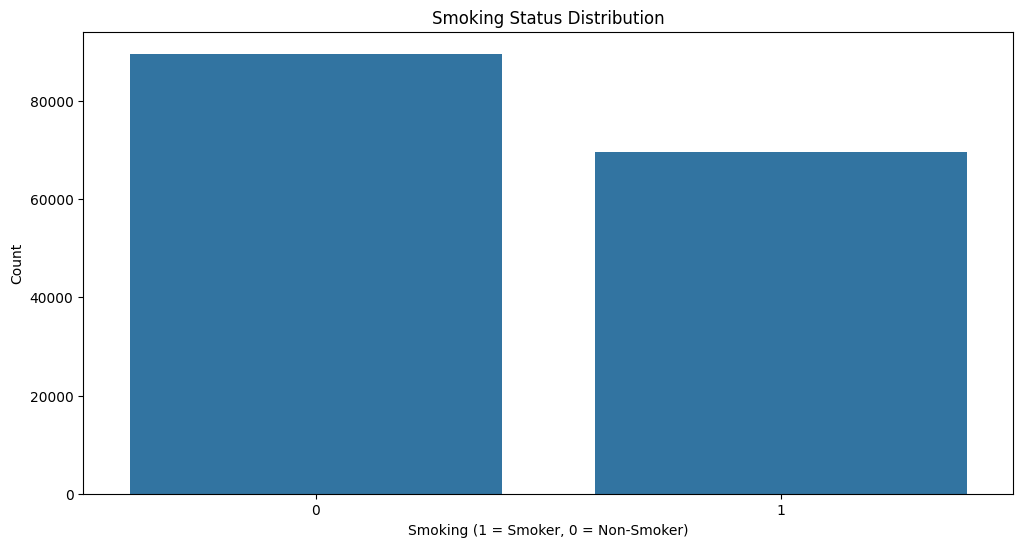

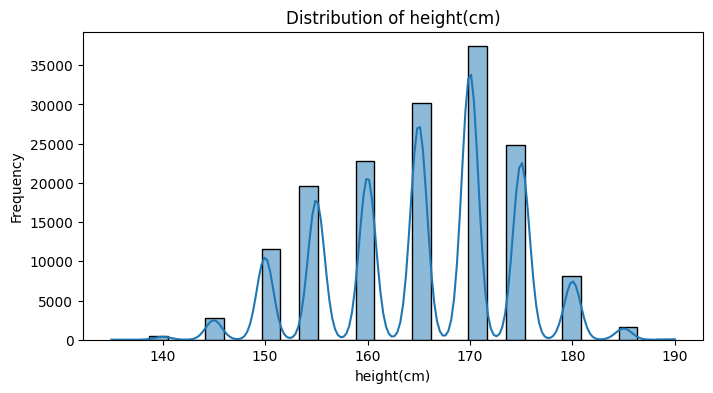

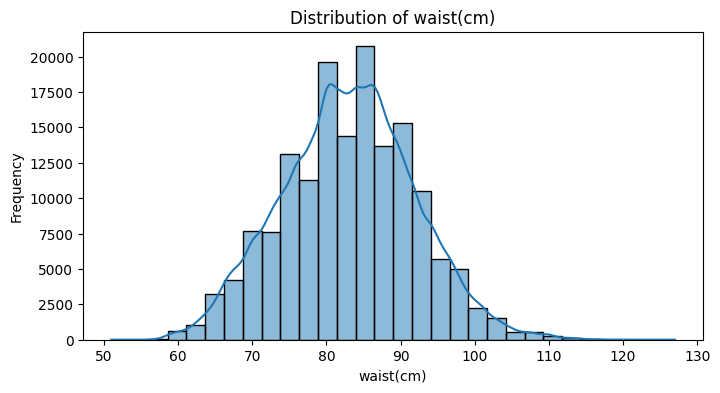

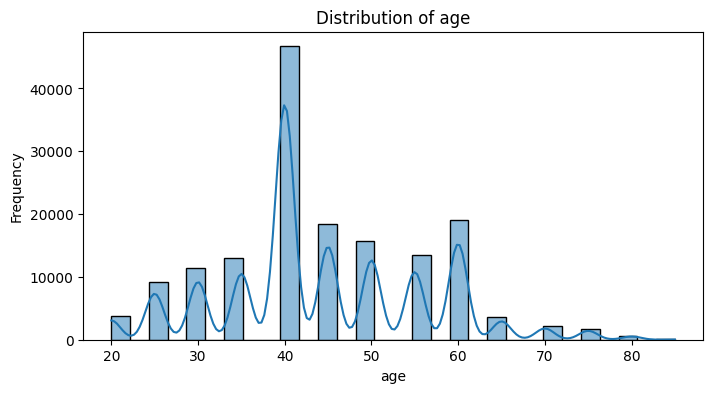


Missing Values:
Series([], dtype: int64)


In [14]:
# Univariate Analysis
plt.figure(figsize=(12, 6))
sns.countplot(x='smoking', data=data)
plt.title('Smoking Status Distribution')
plt.xlabel('Smoking (1 = Smoker, 0 = Non-Smoker)')
plt.ylabel('Count')
plt.show()

# Histograms for continuous features
continuous_features = ['height(cm)', 'waist(cm)', 'age']
for feature in continuous_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Checking missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])

# Bivariate Analysis

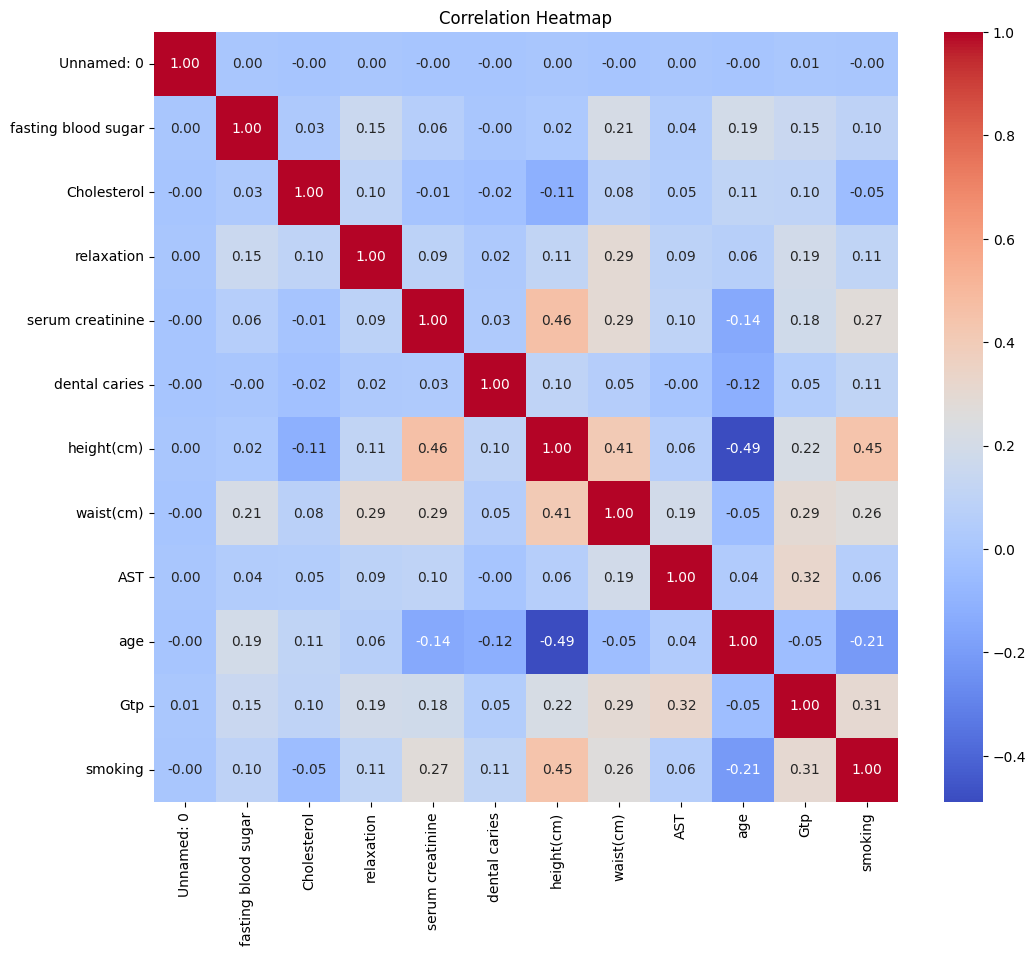

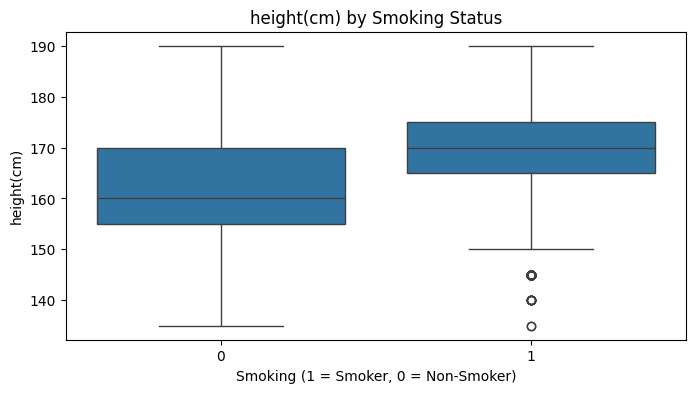

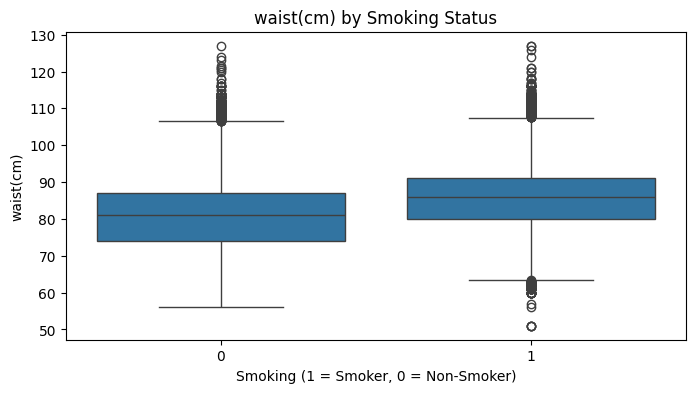

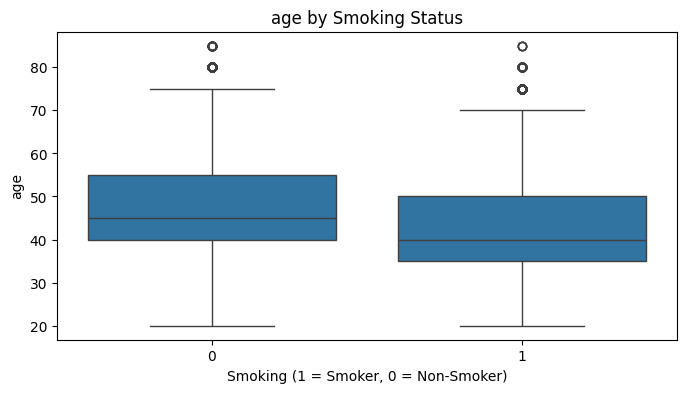

In [15]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

# Smoking status vs Continuous Features
for feature in continuous_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='smoking', y=feature, data=data)
    plt.title(f'{feature} by Smoking Status')
    plt.xlabel('Smoking (1 = Smoker, 0 = Non-Smoker)')
    plt.ylabel(feature)
    plt.show()

# Multivariate Analysis

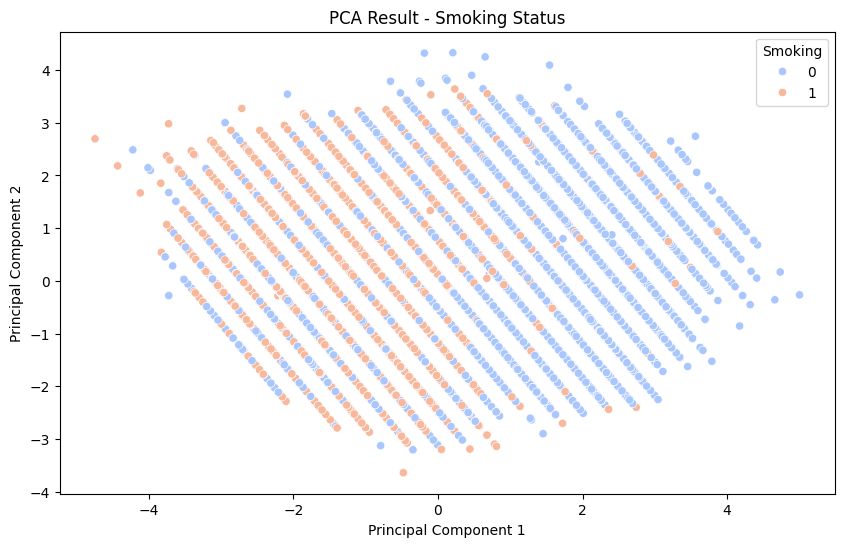

In [16]:
# Standardize the data for PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[continuous_features])

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Add PCA results to the dataset
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

# Scatter plot of the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='smoking', data=data, palette='coolwarm')
plt.title('PCA Result - Smoking Status')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Smoking')
plt.show()